## t-sne 觀察 : 流形還原  

## [作業目標]
- 試著模仿範例寫法, 觀察 S 形使用 t-SNE , 在不同困惑度 (perplexity) 下的流形還原效果  

## [作業重點]
- 使用 S 形資料集, 觀察 t-sne 在困惑度 (perplexity) 有所不同時, 流形還原的效果如何變化 (In[4], Out[4])
- Hint : ax.scatter(Y[red, 0], Y[red, 1], c="r") 與 ax.scatter(Y[green, 0], Y[green, 1], c="g") 兩行改一行 ax.scatter(Y[:, 0], Y[:, 1], c=color)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time
import warnings
warnings.filterwarnings('ignore')

S-curve, perplexity=4 in 0.59 sec
S-curve, perplexity=6 in 0.6 sec
S-curve, perplexity=9 in 0.6 sec
S-curve, perplexity=14 in 0.61 sec
S-curve, perplexity=21 in 0.68 sec
S-curve, perplexity=30 in 0.78 sec
S-curve, perplexity=45 in 0.78 sec
S-curve, perplexity=66 in 0.73 sec
S-curve, perplexity=100 in 0.91 sec


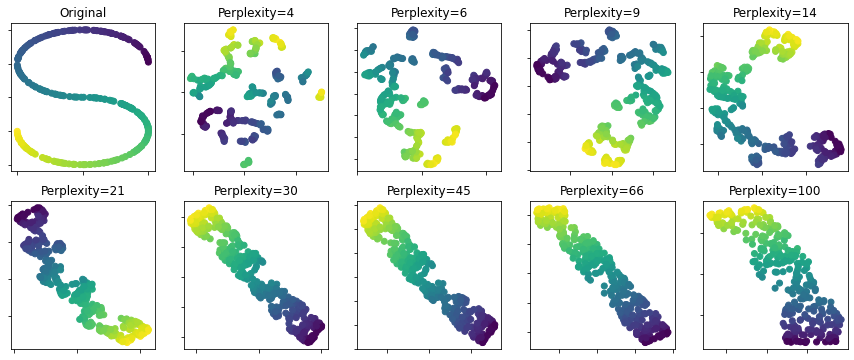

In [2]:
# 設定模型與繪圖參數
n_samples = 300
n_components = 2
(fig, subplots) = plt.subplots(2, 5, figsize=(15, 6))
perplexities = [4, 6, 9, 14, 21, 30, 45, 66, 100]

# 設定S曲線資料點
X, color = datasets.make_s_curve(n_samples, random_state=0)

# 繪製資料原圖
ax = subplots[0][0]
ax.set_title("Original")
ax.scatter(X[:, 0], X[:, 2], c=color)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

# 繪製不同 perplexity 下的 t-SNE 流形還原圖 (請注意! 語法也要對應調整)
for i, perplexity in enumerate(perplexities):
    if i<4:
        ax = subplots[0][i+1]
    else:
        ax = subplots[1][i-4]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("S-curve, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))

    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
    
plt.show()

### 筆記
- Perplexity 越低時, 圖形越零散, 越高時分群好, 但圖形沒有更接近原圖
- 因為資料不像同心圓(範例)需要首尾相接, 因此在還原流型時會變成一直線
- 一樣 Perplexity 越高, 執行時間也越久